## Análise de ações da bolsa de valores do Brasil

Prezados,

No módulo da prova estará disponível o arquivo HistoricoB3.csv com os dados que vocês deverão analisar. Os dados se tratam de variações da bolsa de valores ao longo do ano de 2022, bem como as cotações de ações das duas maiores empresas do país (Petrobras e Vale). Envie o arquivo com suas respostas e cálculos e gráficos necessários para corroborar com sua análise (o formato pode ser IPYNB ou PDF).

1) Estude os dados que estão nas colunas, realize as estatísticas descritivas necessárias.

2) É necessário calcular o z-score destas variáveis? Justifique sua resposta.

3) Verifique a dispersão dos dados e escreva um breve texto a explicando.

4) Faça a correlação dos dados das ações (Petrobras e Vale) com a cotação da Bolsa (fechamento IBOV). São boas correlações? Explique sua resposta.

5) É possível afirmar que a bolsa brasileira depende exclusivamente destas duas ações? Justifique sua resposta com os valores encontrados.

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

dados = pd.read_csv("HistoricoB3.CSV")
df_dados = pd.DataFrame(dados)

colunas = ['Fechamento IBOV', 'Fechamento Petrobras', 'Fechamento Vale']

dados.head()

,Data,Fechamento IBOV,Fechamento Petrobras,Fechamento Vale
0,29/dez/22,109734.60,24.50,88.88
1,28/dez/22,110236.71,24.80,88.99
2,27/dez/22,108578.20,25.11,89.19
3,26/dez/22,108737.75,24.94,87.11
4,23/dez/22,109697.57,25.12,86.32


In [4]:
df_dados.describe()

,Fechamento IBOV,Fechamento Petrobras,Fechamento Vale
count,259.000000,259.000000,259.000000
mean,109733.404015,30.715328,80.410039
std,5643.183060,3.184825,9.589997
min,96120.850000,21.470000,63.050000
25%,106583.365000,28.785000,71.870000
50%,110500.530000,31.520000,81.260000
75%,113520.430000,33.000000,86.775000
max,121570.150000,38.060000,105.070000


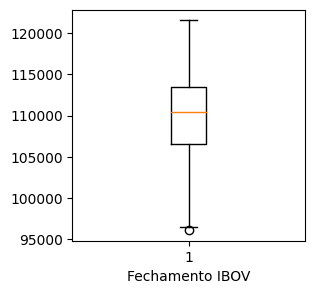

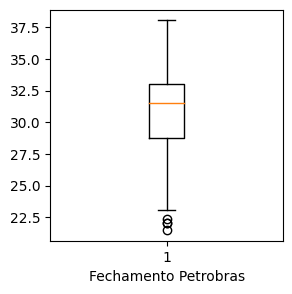

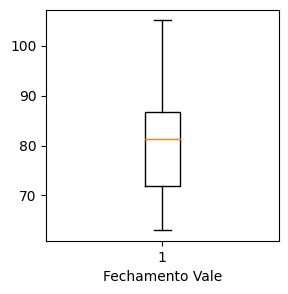

In [56]:
for col in colunas:
  plt.figure(figsize=(3,3))
  plt.boxplot(dados[col], vert = True)
  plt.xlabel(col, loc="center", fontsize=10)
  plt.show()
  print('\n')

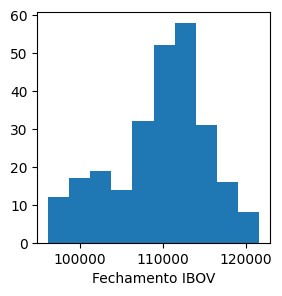

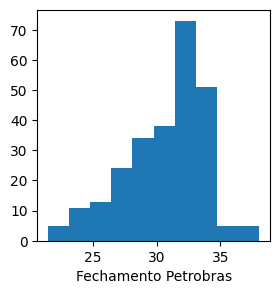

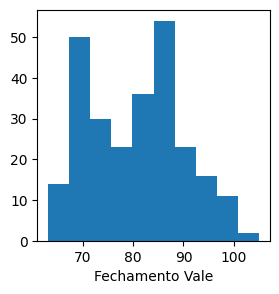

In [55]:
for col in colunas:
  plt.figure(figsize=(3,3))
  plt.hist(dados[col])
  plt.xlabel(col, loc="center", fontsize=10)
  plt.show()
  print('\n')

In [82]:
z_score = stats.zscore(df_dados[['Fechamento IBOV', 'Fechamento Petrobras', 'Fechamento Vale']])
print(z_score.median(),"\n")
print(z_score.mean())

Fechamento IBOV         0.136202
Fechamento Petrobras    0.253147
Fechamento Vale         0.088802
dtype: float64 

Fechamento IBOV         6.172669e-17
Fechamento Petrobras   -2.194727e-16
Fechamento Vale        -2.743408e-16
dtype: float64


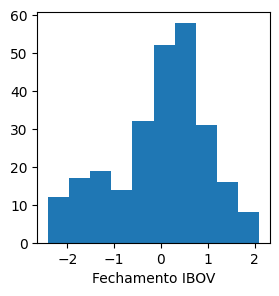

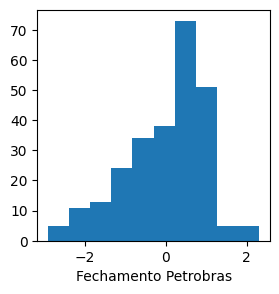

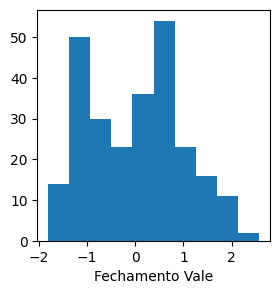

In [70]:
for col in colunas:
  plt.figure(figsize=(3,3))
  plt.hist(z_score[col])
  plt.xlabel(col, loc="center", fontsize=10)
  plt.show()
  print('\n')

In [65]:
print("Correlação entre Fechamento IBOV e Fechamento Petrobras\n")
df_dados[['Fechamento Petrobras', 'Fechamento IBOV']].corr().drop('Fechamento Petrobras', axis=0).drop('Fechamento IBOV', axis=1)

Correlação entre Fechamento IBOV e Fechamento Petrobras



,Fechamento Petrobras
Fechamento IBOV,0.426108


In [63]:
print("Correlação entre Fechamento IBOV e Fechamento Vale\n")
df_dados[['Fechamento Vale', 'Fechamento IBOV']].corr().drop('Fechamento Vale', axis=0).drop('Fechamento IBOV', axis=1)

Correlação entre Fechamento IBOV e Fechamento Vale



,Fechamento Vale
Fechamento IBOV,0.328247


In [68]:
# Respostas:

# 2) Não é obrigatório, pois existem outras formas de entender a dispersão dos dados.
#    No entanto é bom, pois com o Z-score é possível ter uma análise mais precisa sobre a dispersão dos dados, ou seja, sobre como a bolsa variou ao longo do ano.
#    Além disso, é bom pois com o gráfico do Z-score é possível observar facilmente se os dados estão com uma distribuição normal

# 3) Observando as saídas das funções 'describe()', 'hist()' e 'boxplot()' dos dados é possível fazer uma análise sobre a dispersão dos dados
#    Primeiramente, analizando a saída da função 'describe()', observa-se que a média e o 50% (mediana) estão próximos um do outro, o que por sua vez indica uma distribuição simétrica
#    Além disso, a diferença dos valores mínimo para os máximos não são muito grandes. Sendo que estes dois valores estão se diferenciando da média de maneira proporcional
#    Outra coisa que vale a pena observar é que o primeiro quartil (25%) não está muito distante do terceiro quartil (75%) em 'Fechamento IBOV' e 'Fechamento Petrobras' só havendo uma diferença um pouco maior em 'Fechamento Vale'. Isso indica uma distribuição uniforme em 'Fechamento IBOV' e 'Fechamento Petrobras' e uma não uniforme em 'Fechamento Vale'
#    Em segundo lugar, analizando a saída da função 'hist()' é possível observar que os gráficos de 'Fechamento IBOV' e 'Fechamento Petrobras' se aproximam de uma curva normal o que indica uma dispersão uniforme nestes dois, diferentemente do que ocorre em 'Fechamento Vale'
#    Além disso observando as médias e medianas dos Z-scores é possível observar que elas estão próximas de 0 em todos os dados e os gráficos de 'Fechamento IBOV' e 'Fechamento Petrobras' se aproximam da distribuição normal padrão enquanto o de 'Fechamento Vale' não. Isso indica uma dispersão uniforme em 'Fechamento IBOV' e 'Fechamento Petrobras'
#    Em terceiro lugar, analizando a saída da função 'boxplot()' é possível observar a presença de poucos outliers em relação a quantidade total de dados o que indica uma dispersão uniforme
#    Além disso os outliers que existem não estão muito distantes dos limites do boxplot
#    Portanto, nota-se que, de maneira geral, os dados estão bem distribuídos

# 4) As correlações não são boas pois estão se aproximando mais de 0 do que de 1 ou -1

# 5) Não. Porque a correlação entre 'Fechamento IBOV' e 'Fechamento Petrobras' é 0.426108 o que não é uma boa correlação e a entre 'Fechamento IBOV' e 'Fechamento Vale' é 0.328247 o que também não é boa.